In [1]:
pip install -U notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas import read_csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [3]:
fraud = read_csv('Fraud_check.csv')

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraud.duplicated().sum()

0

In [8]:
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [9]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [10]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.520000,0.323333,0.361667,0.503333
std,26204.827597,49850.075134,8.842147,0.500017,0.468139,0.480884,0.500406
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,1.000000,0.000000,0.000000,1.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
fraud.iloc[:,0].max()

99619

In [12]:
fraud.iloc[:,0].min()

10003

# Lets assume: taxable_income <= 30000 as “Risky=0” and others are
“Good=1”

In [13]:
fraud['tax']=pd.cut(fraud["Taxable.Income"],bins=[10002,30000,99620],labels=['Risky','Good'])

In [14]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,tax
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [15]:
fraud=pd.get_dummies(fraud,columns=['tax'],drop_first=True)

In [16]:
fraud=fraud.drop('Taxable.Income',axis=1)

In [17]:
fraud

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,tax_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


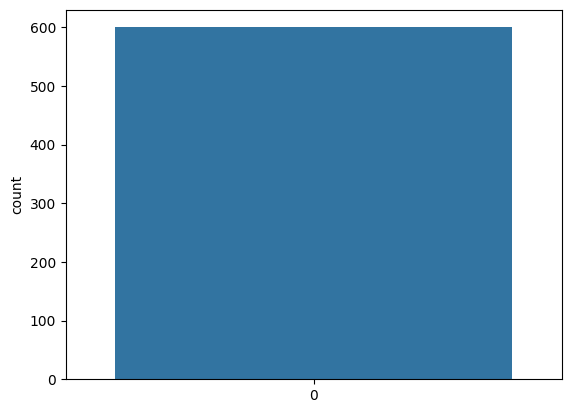

In [18]:
sns.countplot(fraud['tax_Good']);

In [19]:
#sns.pairplot(data=fraud,hue='tax_Good');

In [20]:
X = fraud.drop(['tax_Good'], axis=1)
Y = fraud['tax_Good']

In [21]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [23]:
x_train

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
284,0.934511,0.733333,0.0,0.0,0.0,1.0
423,0.313048,0.633333,0.0,1.0,0.0,1.0
525,0.284645,0.766667,1.0,0.0,1.0,0.0
519,0.783470,0.833333,1.0,0.0,1.0,1.0
12,0.702613,0.466667,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
369,0.364042,0.933333,0.0,1.0,0.0,0.0
320,0.305278,0.366667,1.0,0.0,1.0,1.0
527,0.887907,0.900000,0.0,1.0,0.0,0.0
125,0.746499,0.366667,1.0,0.0,0.0,0.0


In [24]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

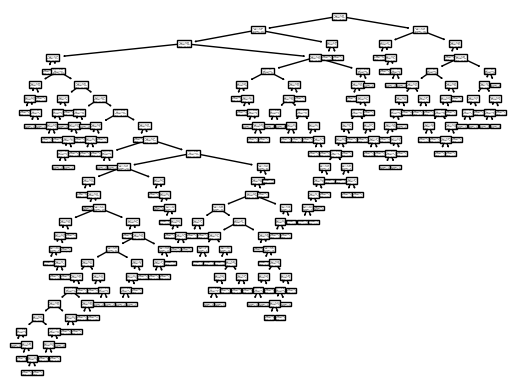

In [25]:
tree.plot_tree(model);

In [26]:
from sklearn import metrics
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1    93
0    27
dtype: int64

In [27]:
df=pd.DataFrame({'Actual values':y_test,'Predicted Values':pred})
df

,Actual values,Predicted Values
69,1,0
27,1,1
488,1,1
540,0,0
285,1,0
...,...,...
131,1,1
354,0,1
230,0,1
175,1,1


In [28]:
np.mean(pred==y_test)

0.6083333333333333

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.11      0.12      0.11        26
           1       0.75      0.74      0.75        94

    accuracy                           0.61       120
   macro avg       0.43      0.43      0.43       120
weighted avg       0.61      0.61      0.61       120



# Decision Tree Classifier (Entropy)

In [30]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=10)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [31]:
#tree.plot_tree(model1);

In [32]:
from sklearn import metrics
pred1=model1.predict(x_test)
pd.Series(pred1).value_counts()

1    105
0     15
dtype: int64

In [33]:
df=pd.DataFrame({'Actual values':y_test,'Predicted Values':pred1})
df

,Actual values,Predicted Values
69,1,1
27,1,1
488,1,1
540,0,0
285,1,0
...,...,...
131,1,1
354,0,1
230,0,1
175,1,1


In [34]:
np.mean(pred1==y_test)

0.725

In [35]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.27      0.15      0.20        26
           1       0.79      0.88      0.83        94

    accuracy                           0.73       120
   macro avg       0.53      0.52      0.51       120
weighted avg       0.68      0.72      0.70       120



In [36]:
cn = ['1','0']
fn = ['City.Population', 'Work.Experience', 'Undergrad_YES',
'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']

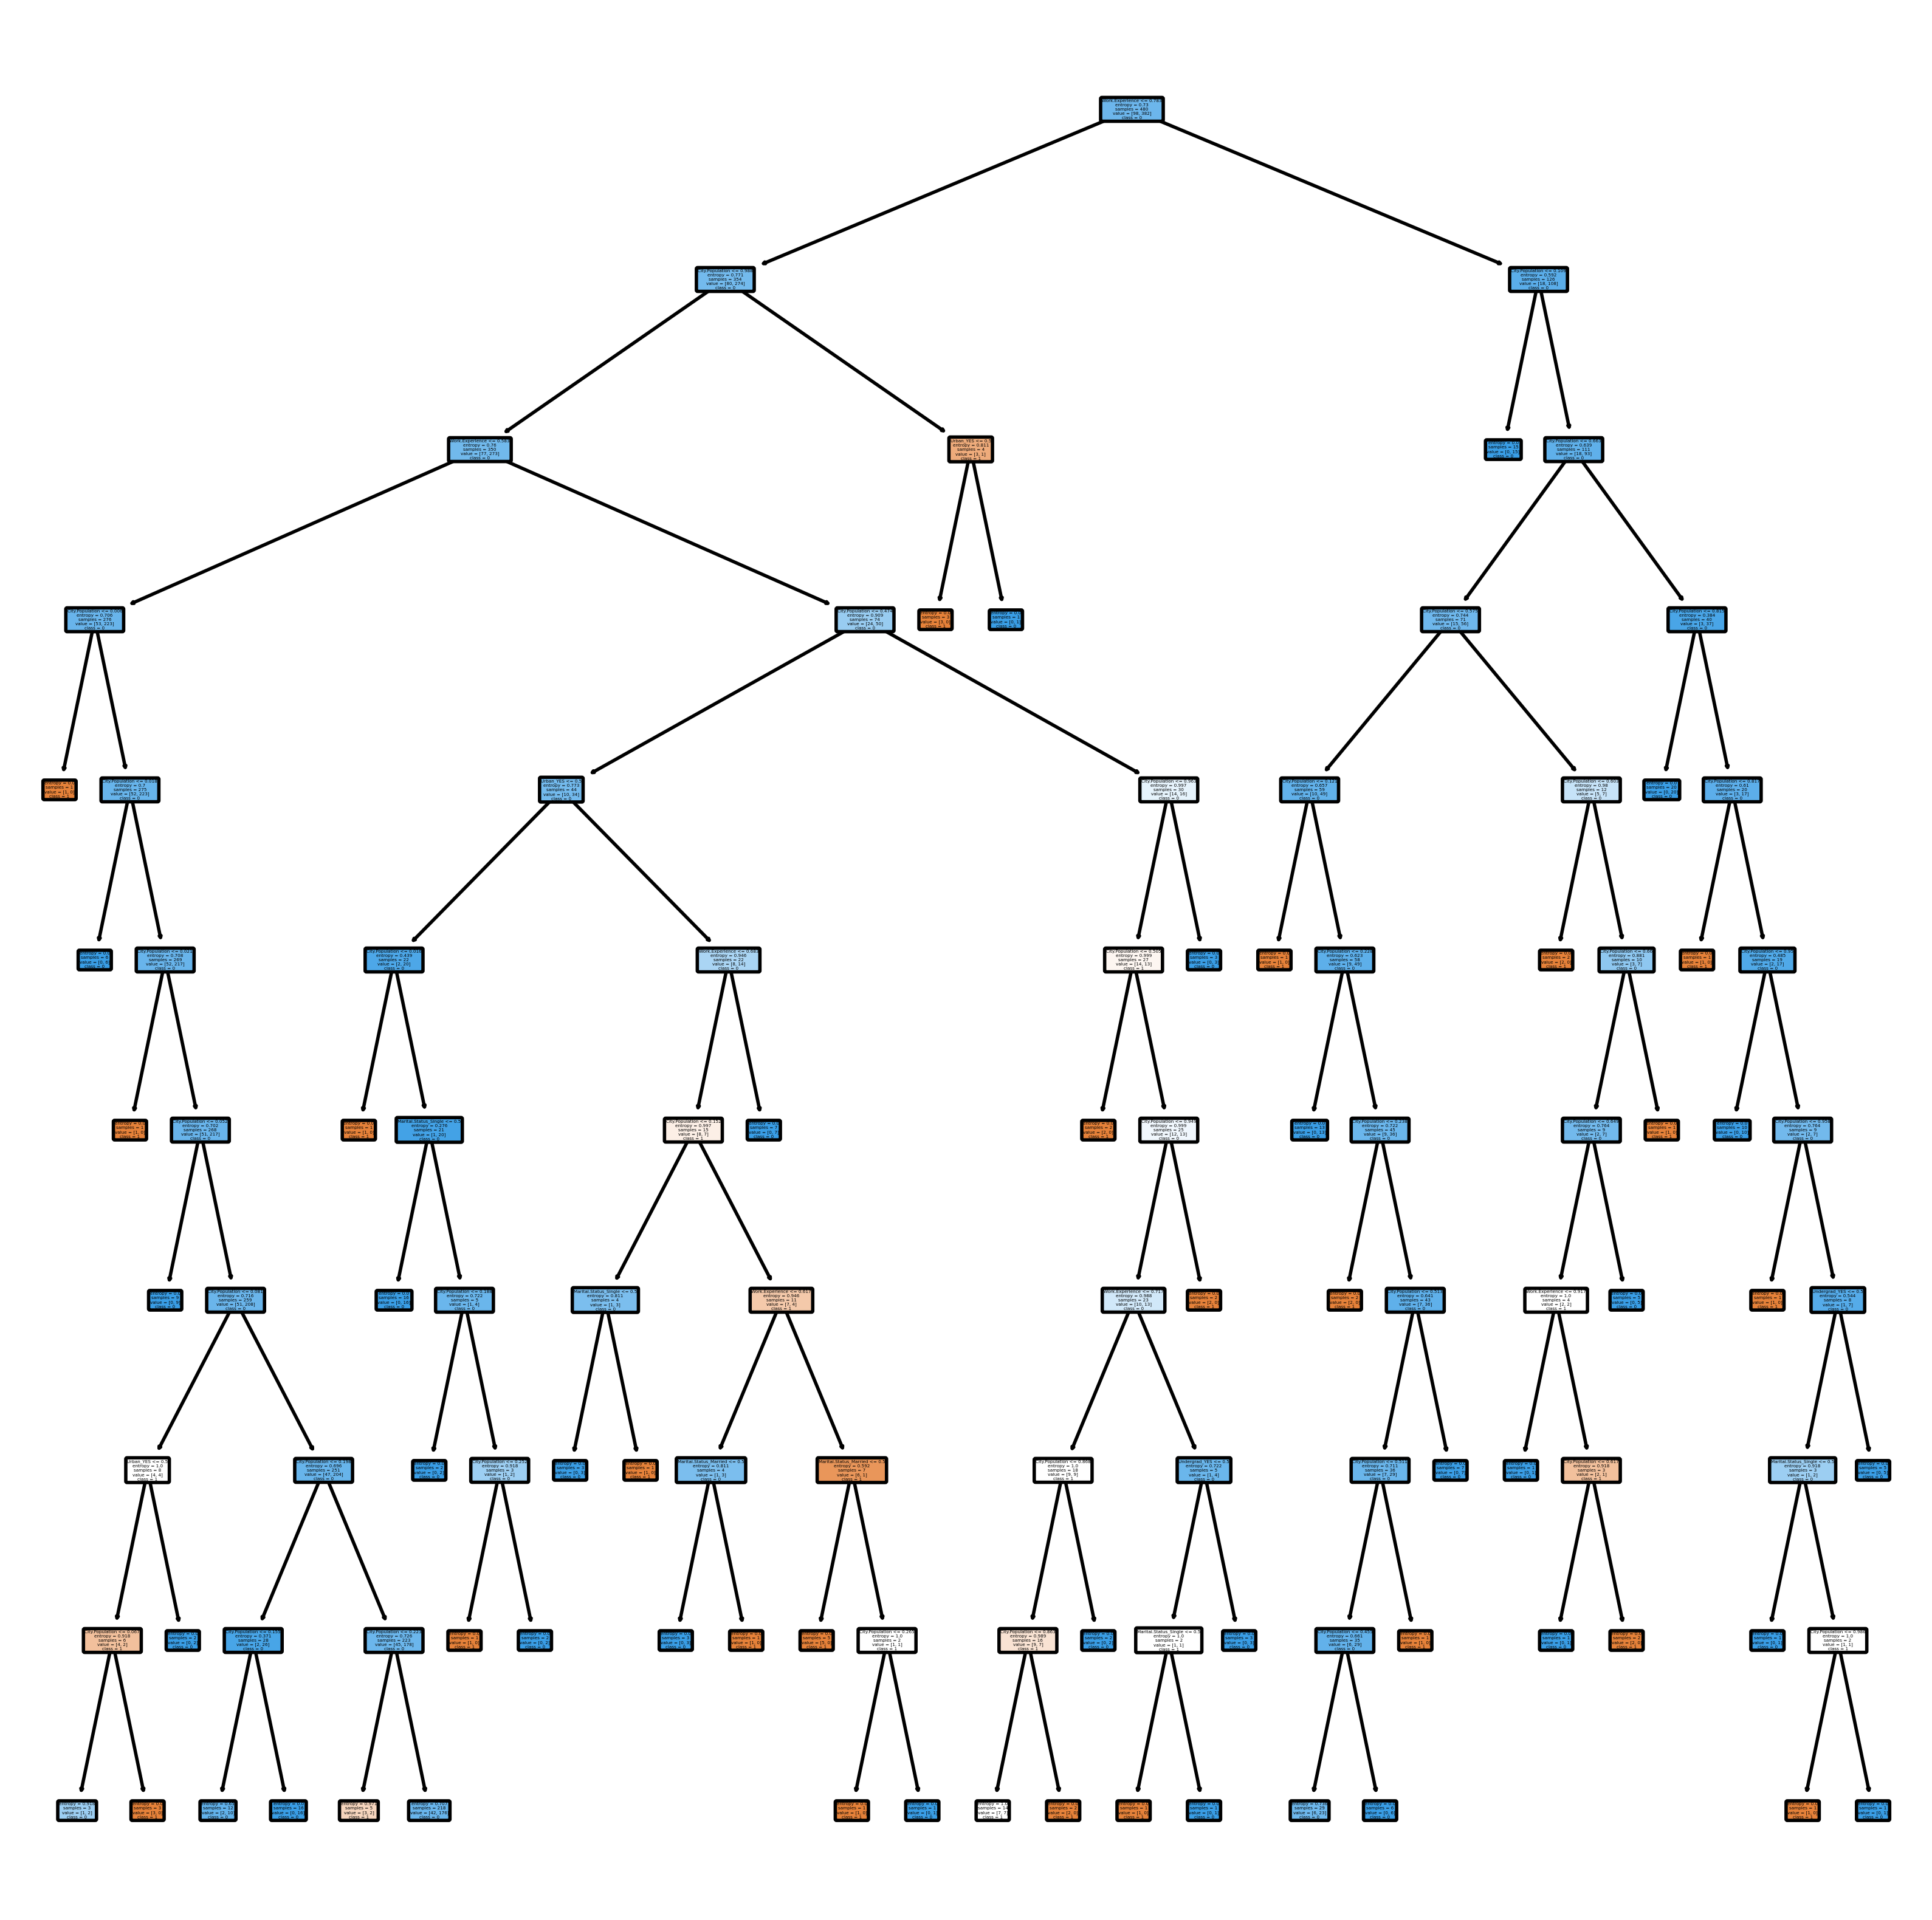

In [37]:
fig,axes =plt.subplots(figsize=(10,10),dpi=400)
tree.plot_tree(model1,
               feature_names=fn,
               class_names=cn,
               filled=True,rounded=True);

# Decision Tree Classifier (Gini)

In [38]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [39]:
from sklearn import metrics
pred2=model2.predict(x_test)
pd.Series(pred2).value_counts()

1    108
0     12
dtype: int64

In [40]:
df=pd.DataFrame({'Actual values':y_test,'Predicted Values':pred2})
df

,Actual values,Predicted Values
69,1,1
27,1,1
488,1,1
540,0,0
285,1,1
...,...,...
131,1,1
354,0,1
230,0,1
175,1,1


In [41]:
np.mean(pred2==y_test)

0.7166666666666667

In [42]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.17      0.08      0.11        26
           1       0.78      0.89      0.83        94

    accuracy                           0.72       120
   macro avg       0.47      0.49      0.47       120
weighted avg       0.65      0.72      0.67       120



In [43]:
X.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES'],
      dtype='object')

In [44]:
cn = ['1','0']
fn = ['City.Population', 'Work.Experience', 'Undergrad_YES',
'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']

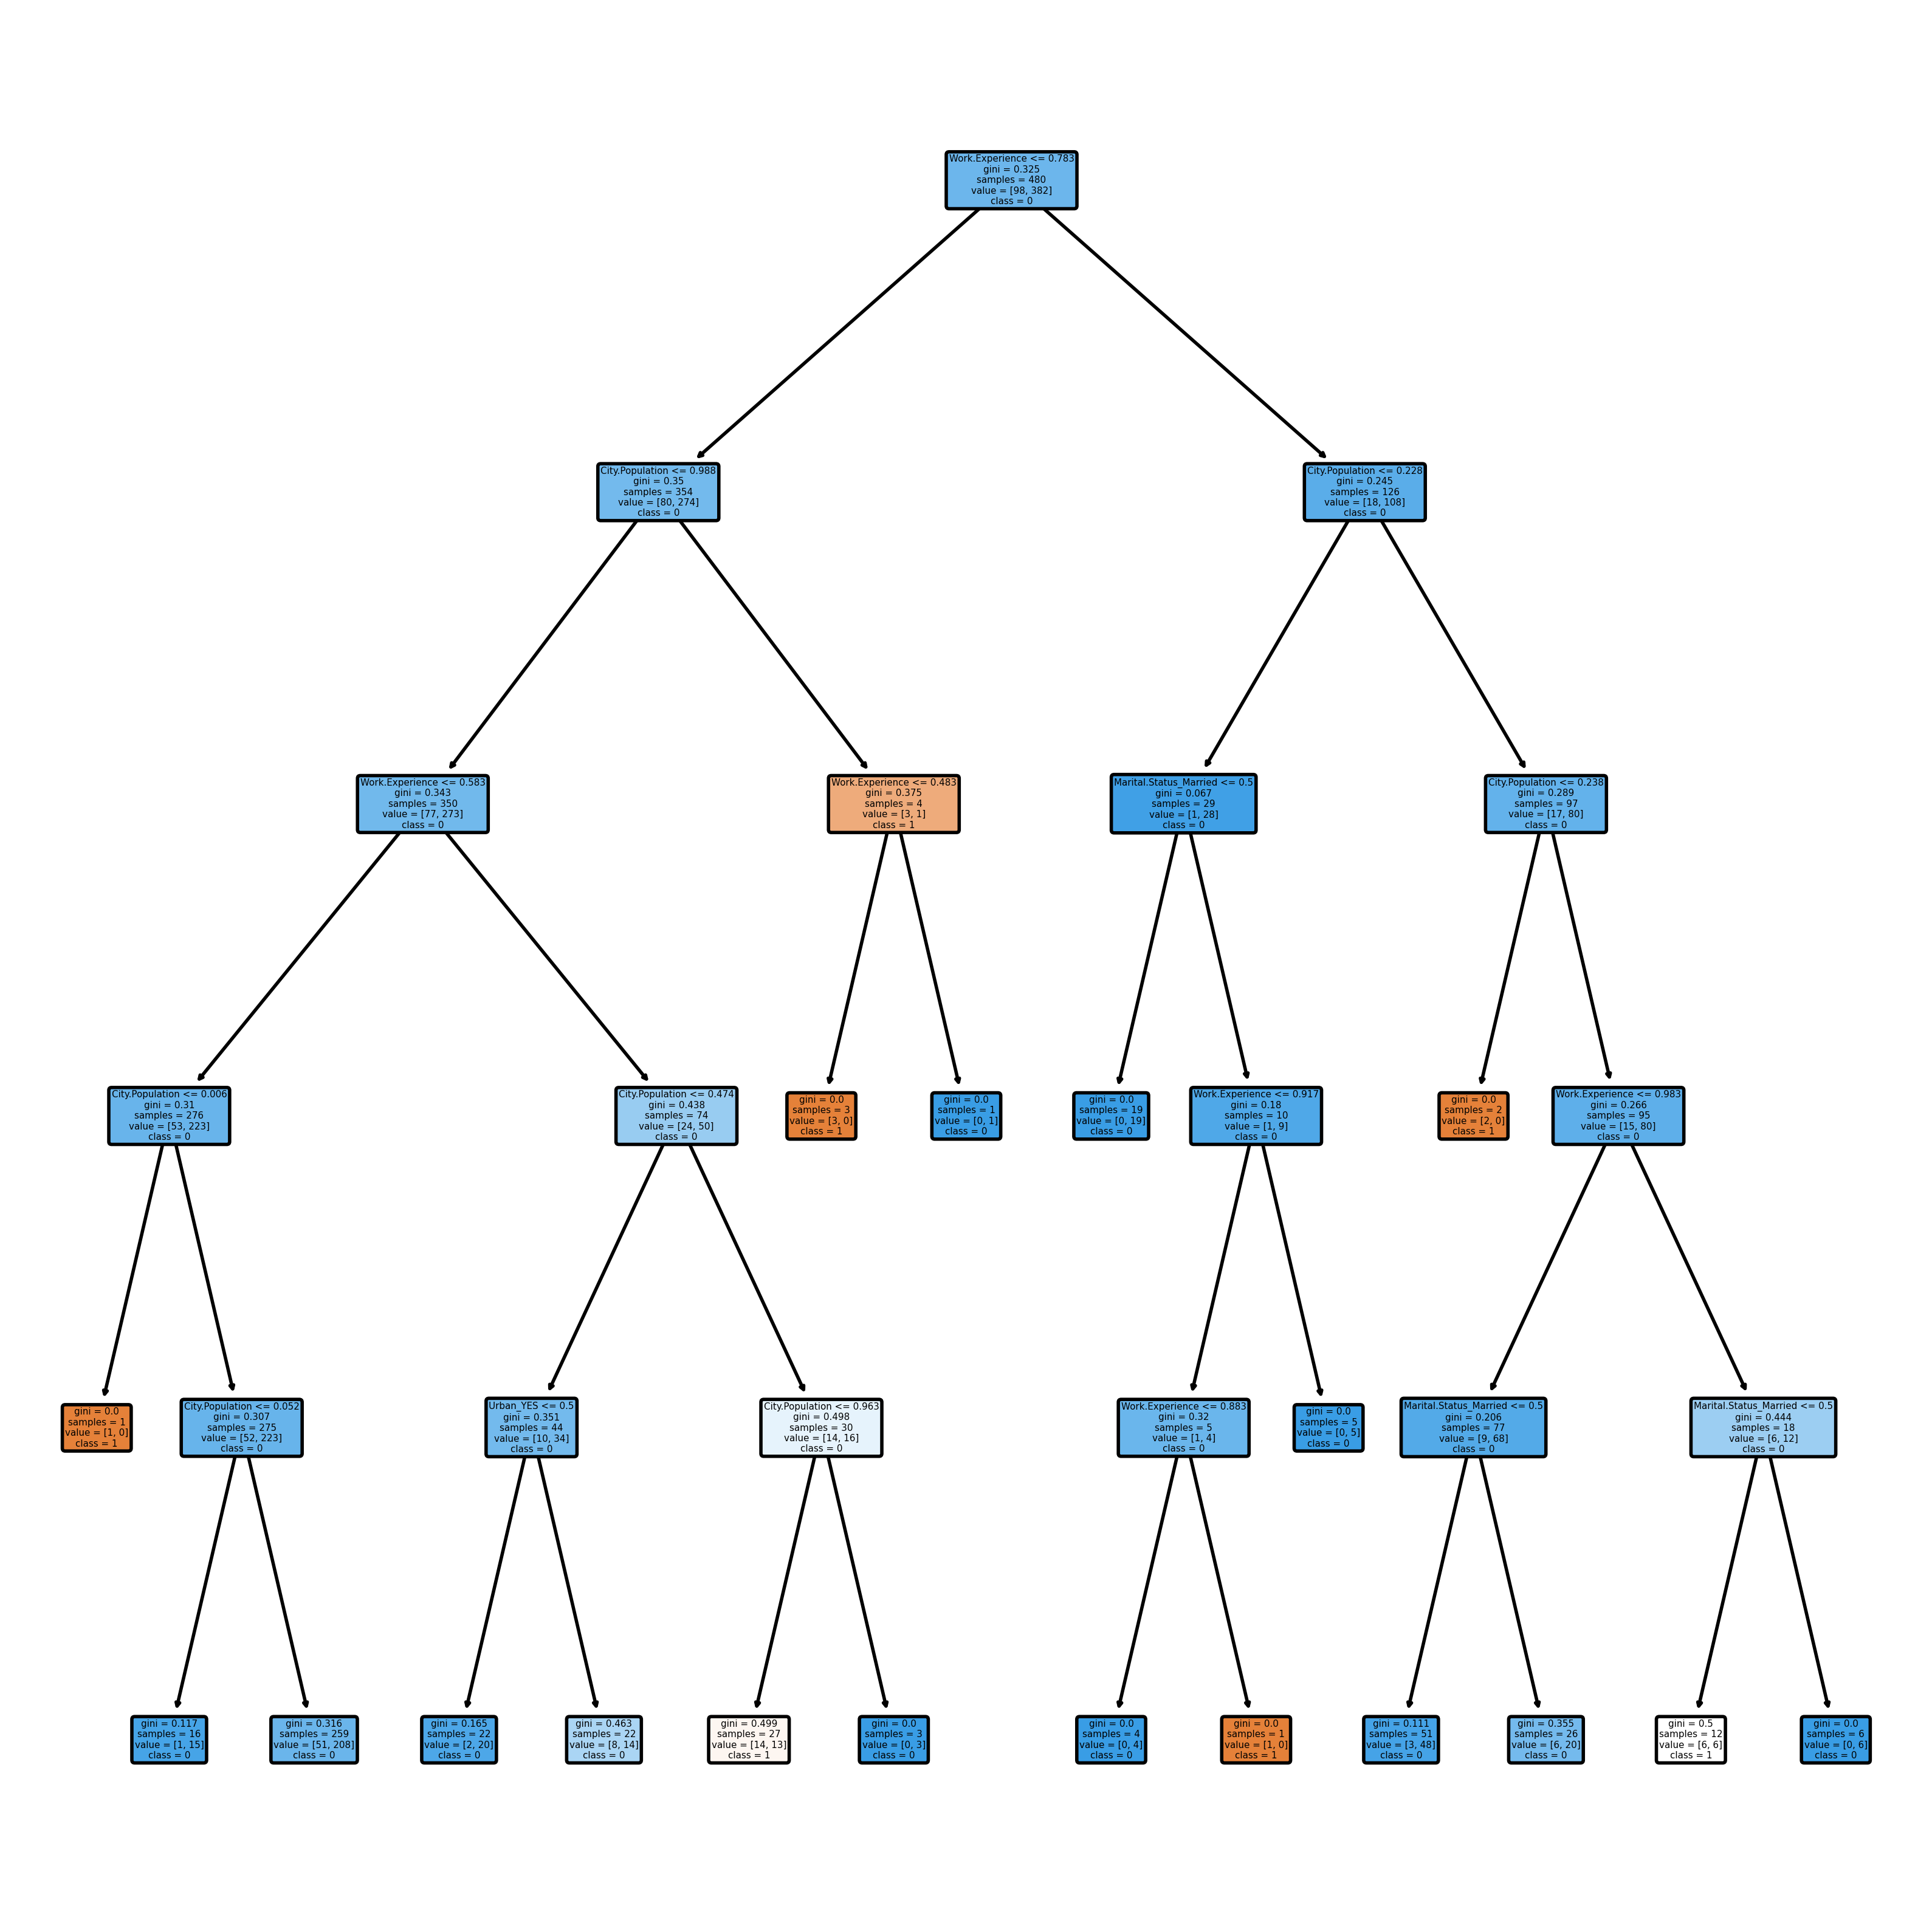

In [45]:
fig,axes =plt.subplots(figsize=(10,10),dpi=400)
tree.plot_tree(model2,
              feature_names=fn,
              class_names=cn,
              filled=True,rounded=True);

# ================Random Forest classifier=====================

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
num_trees = 100
max_features = 6
rfmodel1 = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())


0.6616666666666666


In [48]:
# choose k between 1 to 41
num_trees = [10,20,50,100,200,300,400,500,600,700,800,900,1000]
nf=[2,3,4,5,6,7]
k_scores1 = []






# use iteration to caclulator different k in models,
#then return the average accuracy based on the cross validation

for k in num_trees:
    rf = RandomForestClassifier(criterion= "gini",max_samples=0.8,n_estimators=k,random_state=10)
    scores = cross_val_score(rf, X, Y, cv=10)
    k_scores1.append(scores.mean())


In [49]:
k_scores1

[0.7050000000000001,
 0.7200000000000001,
 0.7283333333333333,
 0.7366666666666667,
 0.7383333333333334,
 0.7416666666666667,
 0.7483333333333333,
 0.7533333333333334,
 0.7483333333333334,
 0.7516666666666667,
 0.7516666666666667,
 0.7516666666666667,
 0.7516666666666667]

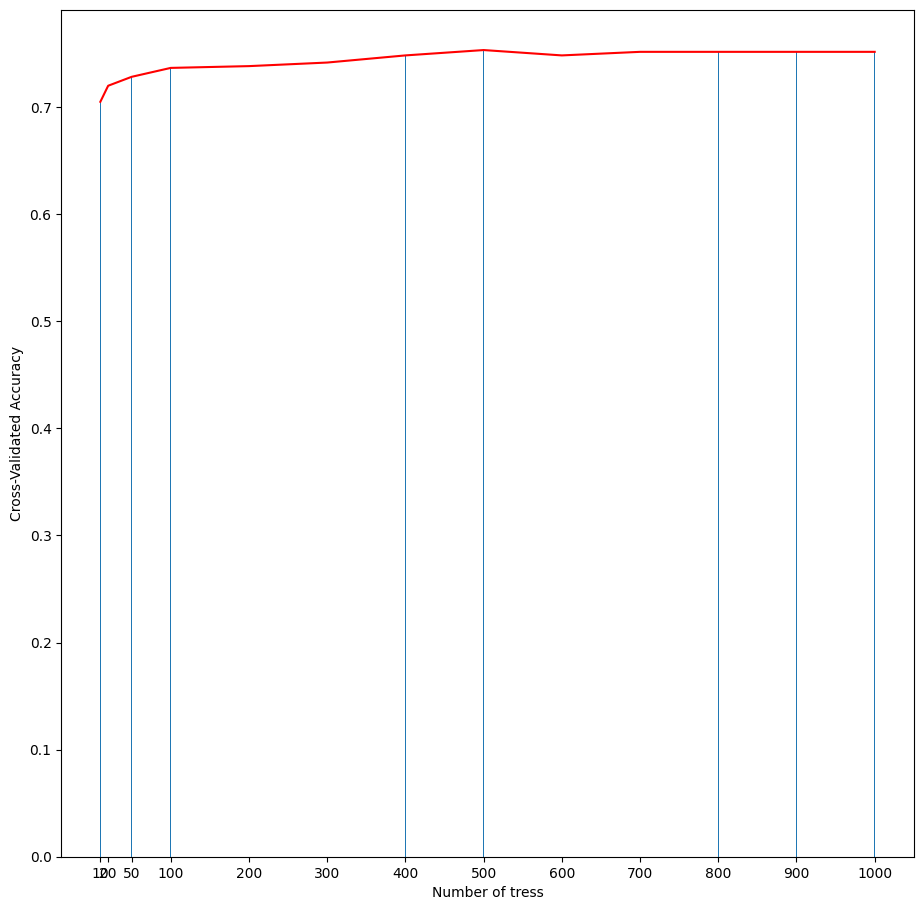

In [50]:
plt.figure(figsize=(11,11))
plt.bar(num_trees, k_scores1)
plt.plot(num_trees, k_scores1,color="red")
plt.xlabel('Number of tress')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(num_trees)
plt.show()

In [84]:
np.argmax(k_scores1)

7

In [85]:
num_trees[np.argmax(k_scores1)]

500

# Using above best hyparameter build model

In [86]:
num_trees = 500
rfmodel3 = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8,criterion="gini",random_state=10)
results = cross_val_score(rfmodel3, X, Y, cv=10)
print(results.mean())

0.7533333333333334


In [87]:
rfmodel3.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, random_state=10)

In [88]:
pred3=rfmodel3.predict(x_test)

In [89]:
metrics.accuracy_score(y_test,pred3)

0.7333333333333333

In [90]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      0.94      0.85        94

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120



In [91]:
import pandas as pd
feature_imp = pd.Series(rfmodel3.feature_importances_ ,index=X.columns)
feature_imp

City.Population           0.525904
Work.Experience           0.349561
Undergrad_YES             0.035764
Marital.Status_Married    0.026111
Marital.Status_Single     0.027178
Urban_YES                 0.035481
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


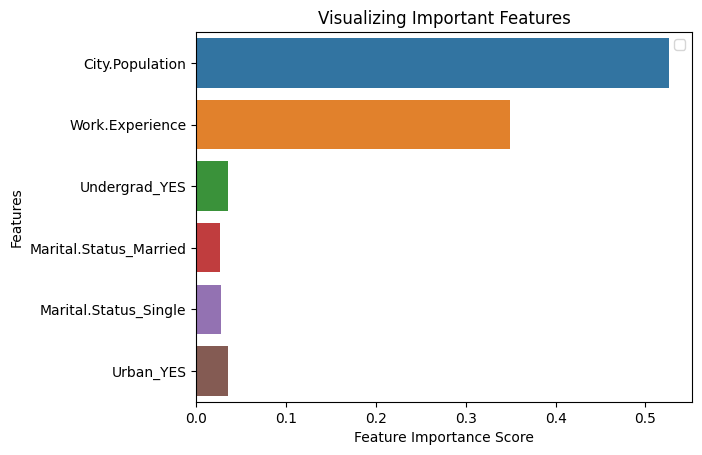

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [93]:
X=X.drop(["Marital.Status_Married","Marital.Status_Single"],axis=1)
X

,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,0.139472,0.333333,0.0,1.0
1,0.622394,0.600000,1.0,1.0
2,0.772568,1.000000,0.0,1.0
3,0.962563,0.500000,1.0,1.0
4,0.010081,0.933333,0.0,0.0
...,...,...,...,...
595,0.078811,0.233333,1.0,1.0
596,0.170058,0.066667,1.0,1.0
597,0.737240,0.000000,0.0,1.0
598,0.886810,0.566667,1.0,0.0


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [95]:
num_trees = 500
rfmodel4 = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8,criterion="gini",random_state=10)
results = cross_val_score(rfmodel4, X, Y, cv=10)
print(results.mean())

0.7566666666666667


In [96]:
rfmodel4.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, random_state=10)

In [97]:
pred4=rfmodel4.predict(X_test)

In [98]:
metrics.accuracy_score(y_test,pred4)

0.725

In [99]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.11      0.04      0.06        26
           1       0.77      0.91      0.84        94

    accuracy                           0.73       120
   macro avg       0.44      0.48      0.45       120
weighted avg       0.63      0.72      0.67       120

